In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv("salesData.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [80]:
data.groupby("Customer type")[["Total", "gross income"]].sum()

,Total,gross income
Customer type,,
Member,164223.444,7820.164
Normal,158743.305,7559.205


In [89]:
data["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [81]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [82]:
data["Invoice ID"].where(data["Customer type"] == "Normal").count()
# data["Invoice ID"].where(data["Customer type"] == "Member").count()

499

In [83]:
data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [88]:
data["Invoice ID"].where(data["Payment"] == "Ewallet").count()

345

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [48]:
for col in data.columns:
   print(col,": ", data[col].nunique())

Invoice ID :  1000
Branch :  3
City :  3
Customer type :  2
Gender :  2
Product line :  6
Unit price :  943
Quantity :  10
Tax 5% :  990
Total :  990
Date :  89
Time :  506
Payment :  3
cogs :  990
gross margin percentage :  1
gross income :  990
Rating :  61


In [49]:
for col in ["Branch", "City", "Customer type", "Product line", "Quantity", "Payment"]:
   print(col, ": ", data[col].unique())

Branch :  ['A' 'C' 'B']
City :  ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type :  ['Member' 'Normal']
Product line :  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Quantity :  [ 7  5  8  6 10  2  3  4  1  9]
Payment :  ['Ewallet' 'Cash' 'Credit card']


In [50]:
print(data["Date"].min()," -> ", data["Date"].max()) 

1/1/2019  ->  3/9/2019


In [51]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [52]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [53]:
droppedData = data[["Invoice ID", "Tax 5%", "Time", "gross margin percentage"]]
data.drop(columns = ["Invoice ID", "Tax 5%", "gross margin percentage"], axis = 1, inplace = True)

In [54]:
droppedData["Time"]

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object

In [55]:
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1


In [56]:
data["month"] = data["Date"].str.slice(0,2)
data["hour"] = data["Time"].str.slice(0,2).astype(int)

In [57]:
data["month"].unique()

array(['1/', '3/', '2/'], dtype=object)

In [58]:
data["hour"]

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: hour, Length: 1000, dtype: int64

In [59]:
monthMap = {
   "1": "January",
   "2": "February",
   "3": "March",
   "4": "April",
   "5": "May",
   "6": "June",
   "7": "July",
   "8": "August",
   "9": "September"
}

data["month"] = data["month"].map(monthMap)

In [60]:
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,month,hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,NaN,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,NaN,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,NaN,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,NaN,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,NaN,13
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4,NaN,17
997,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,NaN,13
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,NaN,15


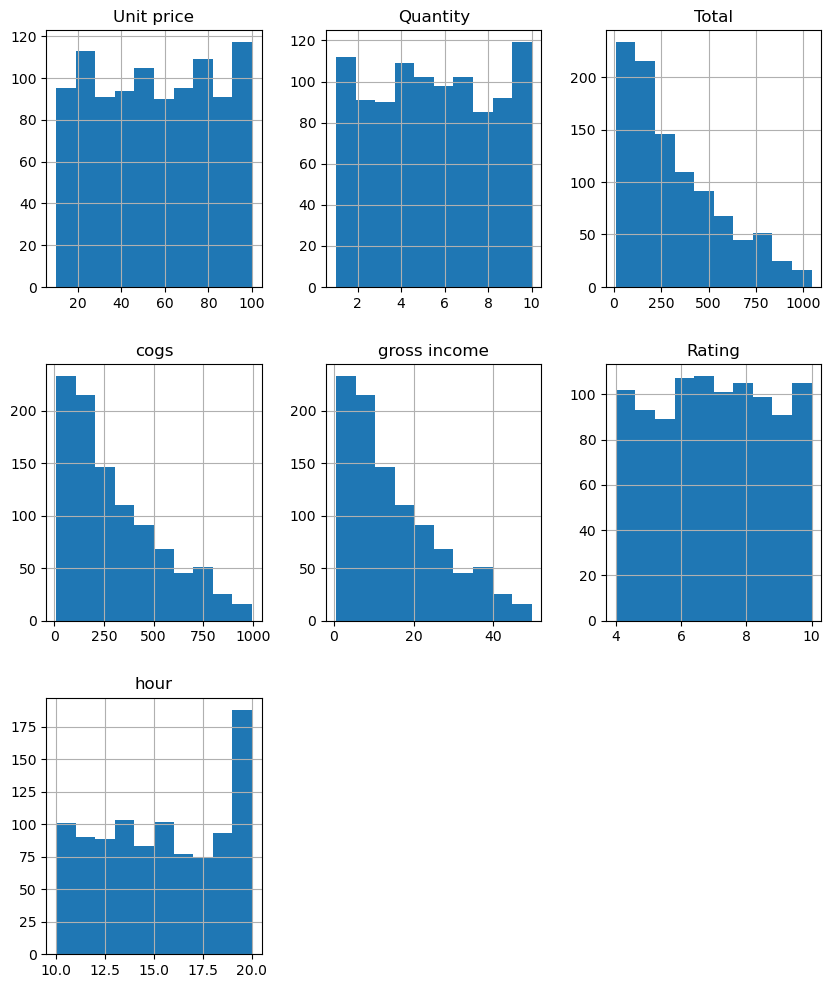

In [61]:
data.hist(figsize = (10, 12));

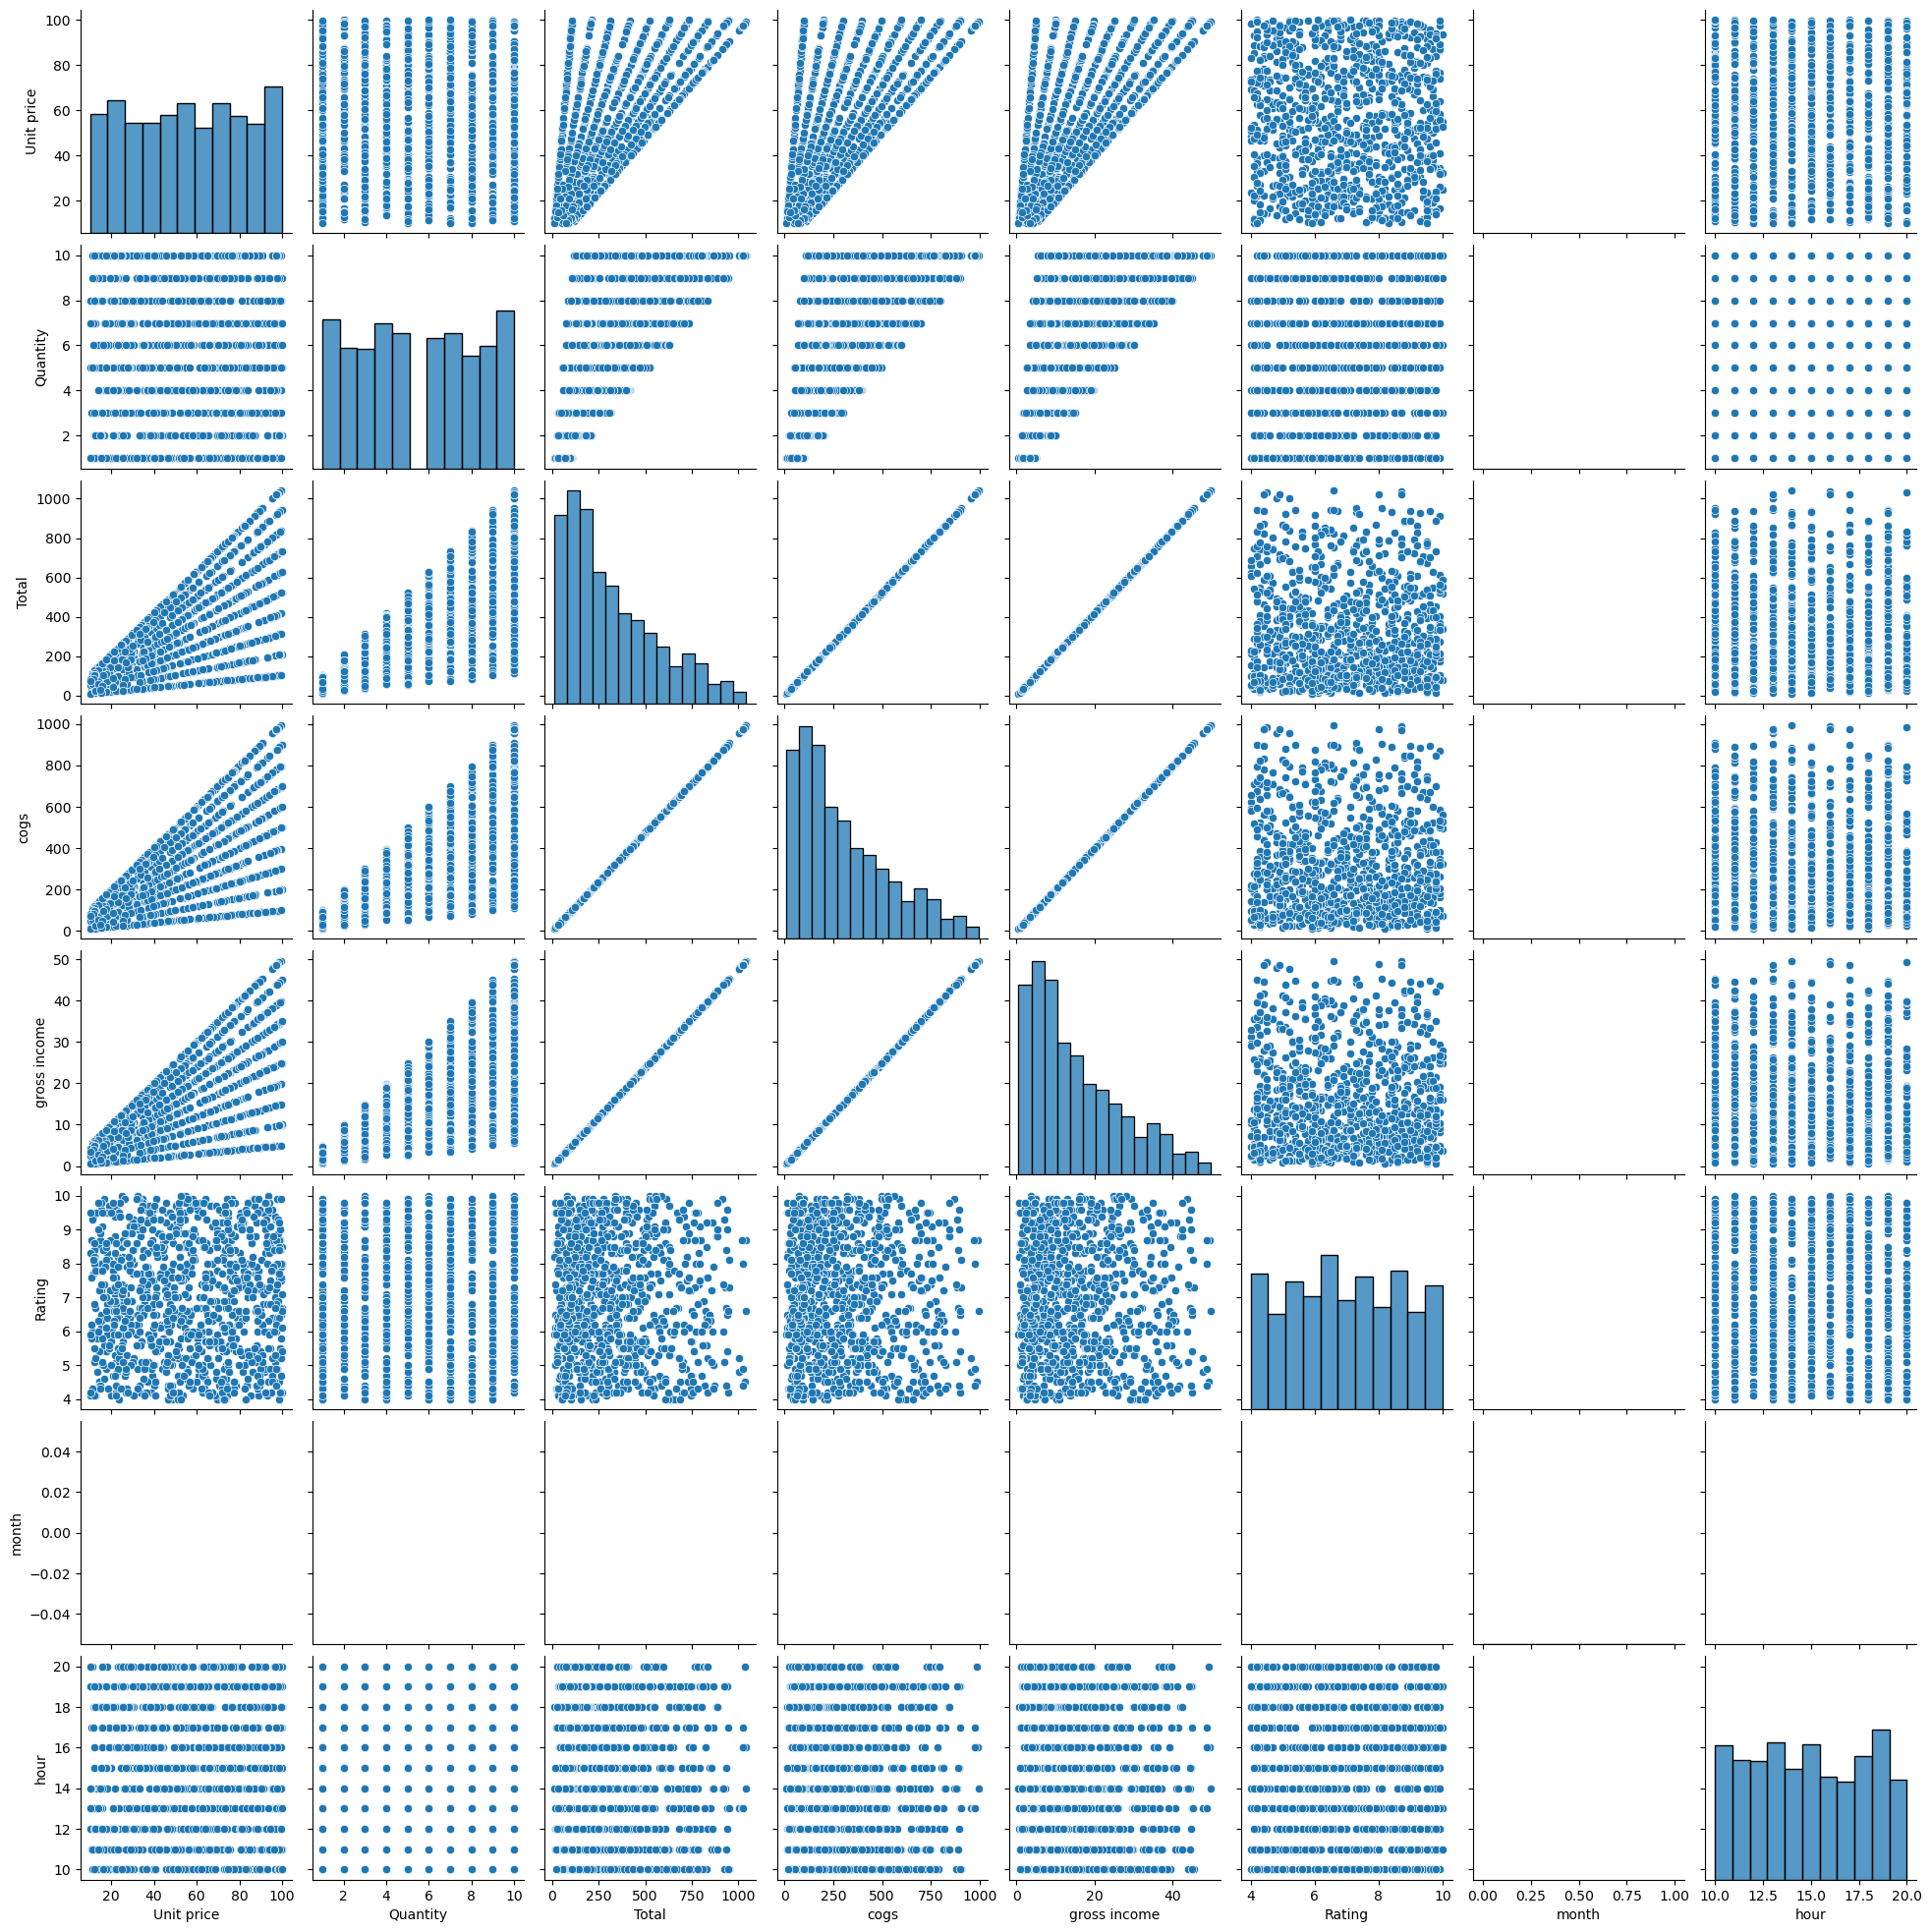

In [62]:
sns.pairplot(data)

In [63]:
data["days"] = data["Date"]

<Axes: >

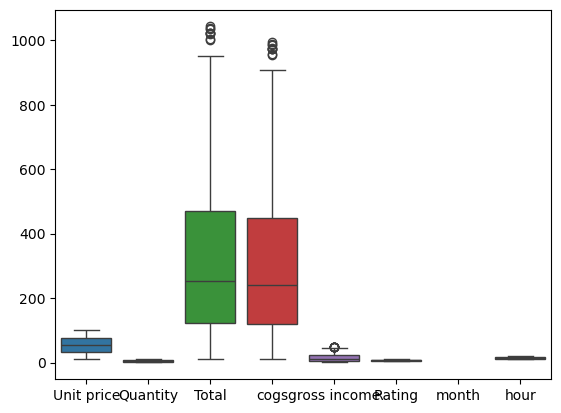

In [64]:
sns.boxplot(data)

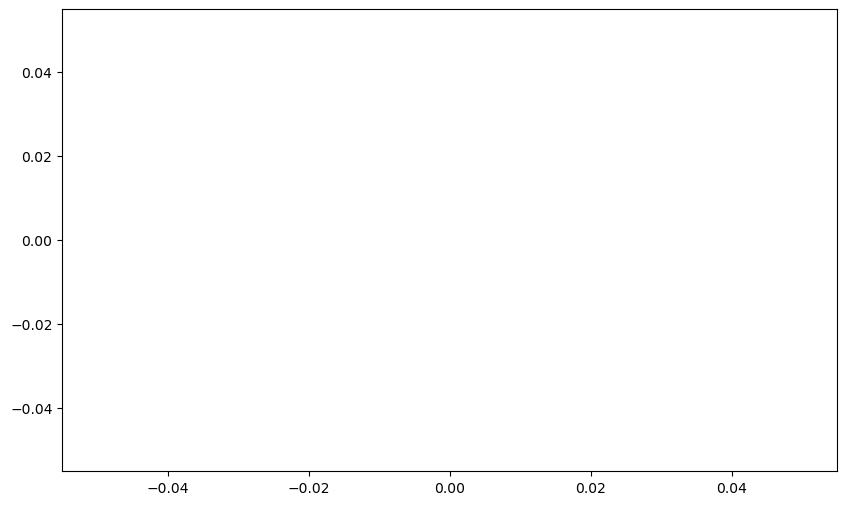

In [65]:
month_gross = data.groupby("month")["gross income"].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.bar(month_gross["month"], month_gross["gross income"])
plt.show()

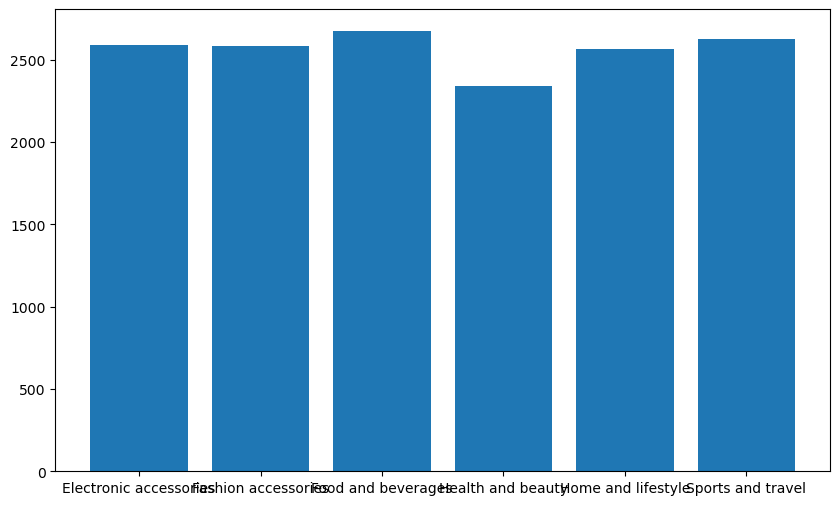

In [66]:
product_gross = data.groupby("Product line")["gross income"].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.bar(product_gross["Product line"], product_gross["gross income"])
plt.show()

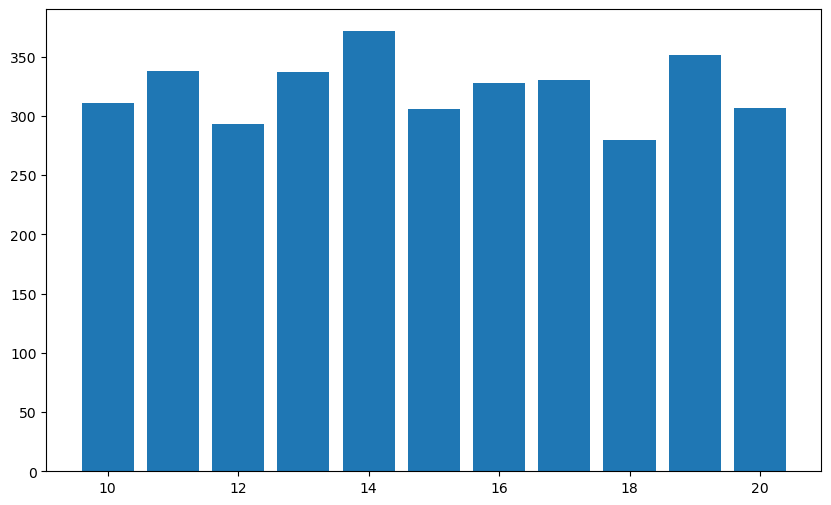

In [67]:
payment_gross = data.groupby("hour")["Total"].mean().reset_index()

plt.figure(figsize = (10, 6))
plt.bar(payment_gross["hour"], payment_gross["Total"])
plt.show()

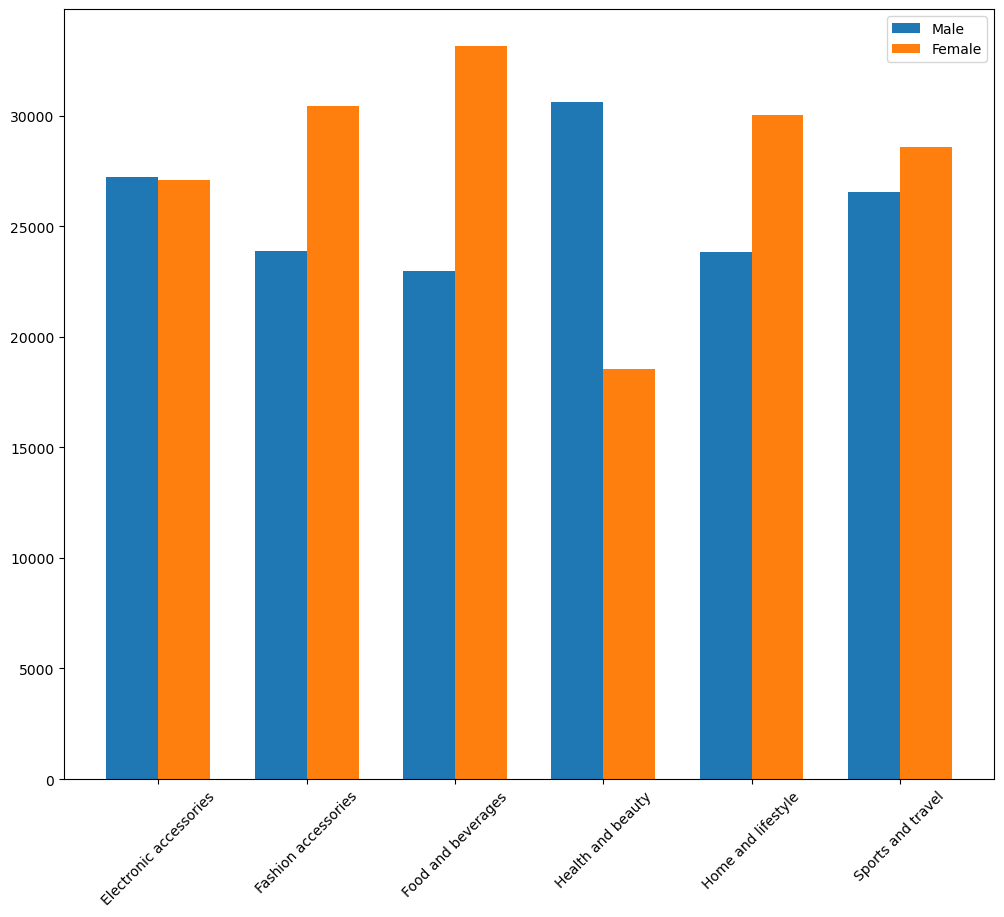

In [68]:
Gender_ProductLine_Total = data.groupby(["Product line", "Gender"])["Total"].sum().reset_index()

product_lines = Gender_ProductLine_Total["Product line"].unique()
male_totals = Gender_ProductLine_Total[Gender_ProductLine_Total['Gender'] == 'Male']['Total'].values
female_totals = Gender_ProductLine_Total[Gender_ProductLine_Total['Gender'] == 'Female']['Total'].values

# Plotting
x = range(len(product_lines))
width = 0.35  # Width of the bars

plt.figure(figsize = (12,10))

plt.bar(x, male_totals, width=width, label='Male')
plt.bar([i + width for i in x], female_totals, width=width, label='Female')

plt.xticks([i + width/2 for i in x], product_lines, rotation=45)
plt.legend()
plt.show()

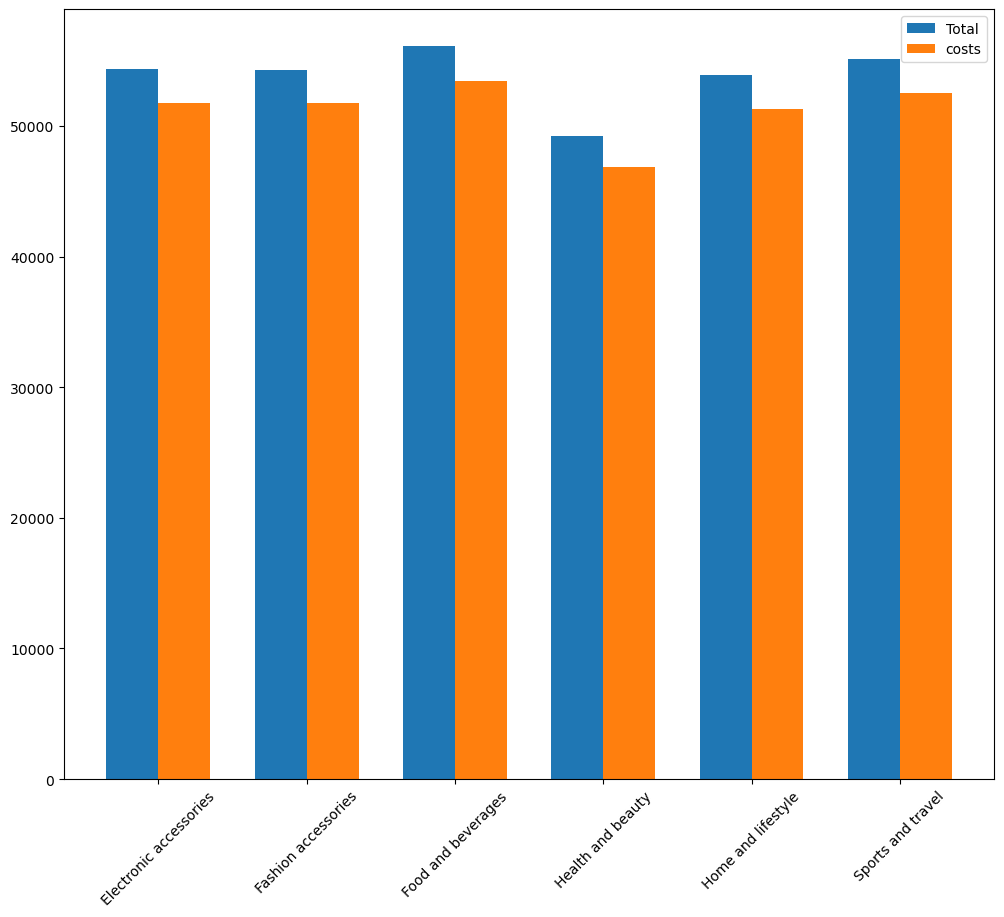

In [69]:
Margin_ProductLine_Total = data.groupby("Product line")[["Total", "cogs"]].sum().reset_index()

product_lines = Margin_ProductLine_Total["Product line"].unique()
totals = Margin_ProductLine_Total['Total'].values
costs = Margin_ProductLine_Total['cogs'].values

# Plotting
x = range(len(product_lines))
width = 0.35  # Width of the bars

plt.figure(figsize = (12,10))

plt.bar(x, totals, width=width, label='Total')
plt.bar([i + width for i in x], costs, width=width, label='costs')

plt.xticks([i + width/2 for i in x], product_lines, rotation=45)
plt.legend()
plt.show()


In [70]:
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,month,hour,days
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,NaN,13,1/5/2019
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,NaN,10,3/8/2019
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,NaN,13,3/3/2019
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,NaN,20,1/27/2019
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,NaN,10,2/8/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,NaN,13,1/29/2019
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4,NaN,17,3/2/2019
997,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,NaN,13,2/9/2019
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,NaN,15,2/22/2019


In [71]:
Rating_City = data.groupby("Branch")["Rating"].mean()

Rating_City

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [72]:
data.where(data["Customer type"] == "Member").count()

Branch           501
City             501
Customer type    501
Gender           501
Product line     501
Unit price       501
Quantity         501
Total            501
Date             501
Time             501
Payment          501
cogs             501
gross income     501
Rating           501
month              0
hour             501
days             501
dtype: int64